In [3]:
import os
import sys
import numpy as np
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
data_dir = "/mnt/c/Users/ruotong/Home/xERTE/tKGR/data/hetrec2011-delicious-2k"
print(os.listdir(data_dir))
df = pd.read_csv(os.path.join(data_dir, "user_taggedbookmarks-timestamps.dat"), sep="\t",header=1, names=['userID', 'bookmarkID', 'tagID', 'timestamp'])
# df = df.reindex(columns=['user','rating','movie','timestamp'])
df.head()

['bookmarks.dat', 'bookmark_tags.dat', 'entity2id.txt', 'ratings.txt', 'readme.txt', 'relation2id.txt', 'tags.dat', 'test.txt', 'train.txt', 'user_contacts-timestamps.dat', 'user_contacts.dat', 'user_taggedbookmarks-timestamps.dat', 'user_taggedbookmarks.dat', 'user_time.txt', 'valid.txt']


,userID,bookmarkID,tagID,timestamp
0,8,2,1,1289255159000
1,8,7,1,1289238901000
2,8,7,6,1289238901000
3,8,7,7,1289238901000
4,8,8,1,1289238545000


In [5]:
df = df.sort_values(by=['timestamp'])
df.head()
split = [0.7, 0.15, 0.15]
rat_num = len(df)
train_data, val_data, test_data = df[:int(rat_num*split[0])],\
    df[int(rat_num*split[0]) : int(rat_num*(split[0]+split[1]))], \
    df[int(rat_num*(split[0]+split[1])) :]

In [6]:
train_data

,userID,bookmarkID,tagID,timestamp
263134,56067,81453,278,1069308763000
263133,56067,81451,1511,1070238787000
263132,56067,81447,2846,1070331931000
263131,56067,81445,16935,1070331992000
263130,56067,81445,7732,1070331992000
...,...,...,...,...
314192,70497,363,343,1286285683000
314196,70497,363,434,1286285683000
314190,70497,363,278,1286285683000
314191,70497,363,298,1286285683000


In [10]:
val_data

,userID,bookmarkID,tagID,timestamp
314198,70497,363,440,1286285683000
314208,70497,363,5583,1286285683000
314193,70497,363,396,1286285683000
314200,70497,363,446,1286285683000
314202,70497,363,648,1286285683000
...,...,...,...,...
250696,52515,77490,1536,1288094211000
10724,1751,3580,3452,1288094264000
10723,1751,3580,944,1288094264000
68932,9660,20640,2528,1288094323000


In [11]:
test_data

,userID,bookmarkID,tagID,timestamp
68934,9660,20640,6475,1288094323000
68931,9660,20640,2397,1288094323000
68929,9660,20640,888,1288094323000
68930,9660,20640,1611,1288094323000
68933,9660,20640,6473,1288094323000
...,...,...,...,...
413854,100668,22600,1964,1289329691000
413851,100668,22600,386,1289329691000
413852,100668,22600,510,1289329691000
436165,107521,30440,3831,1289332087000


In [53]:
user_time = pd.DataFrame(columns=['user', 'start_ts', 'end_ts'])
new_row = dict().fromkeys(['user', 'start_ts', 'end_ts'])
n = 0
for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
    if not (user_time['user'] == row['userID']).any(): # not row['user'] in user_time['user']:
        n += 1
        new_row['user'] = row['userID']
        new_row['start_ts'] = row['timestamp']
        new_row['end_ts'] = row['timestamp']
        # print(new_row)
        user_time.loc[n] = new_row.values()
        # user_time.append(new_row, ignore_index=True)
    elif user_time.loc[user_time['user'] == row['userID'], 'end_ts' ].item() < row['timestamp']:
        #print(user_time.loc[user_time['user'] == row['user'], 'end_ts' ].item())
        # print("row", row["timestamp"])
    # if user_time.loc[user_time['user'] == row['user'], 'end_ts' ].item() < row['timestamp']:
        user_time.loc[user_time['user'] == row['userID'], 'end_ts'] = row['timestamp']
        #user_time.loc[user_time['user'] == row['user'], 'end_ts'] = row['timestamp']
user_time['time'] = user_time['end_ts'] - user_time['start_ts']

  1%|          | 4282/437592 [00:07<12:49, 562.85it/s]


KeyboardInterrupt: 

(array([92.,  2.,  1., ...,  0.,  0.,  1.]),
 array([0.0, 18857053.2, 37714106.4, ..., 188532817893.6, 188551674946.8,
        188570532000.0], dtype=object),
 <BarContainer object of 10000 artists>)

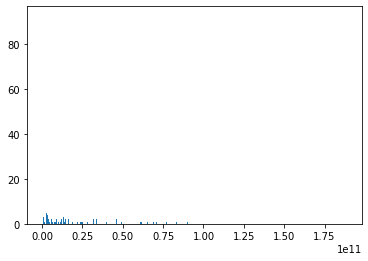

In [23]:

plt.hist(user_time['time'], bins=10000)

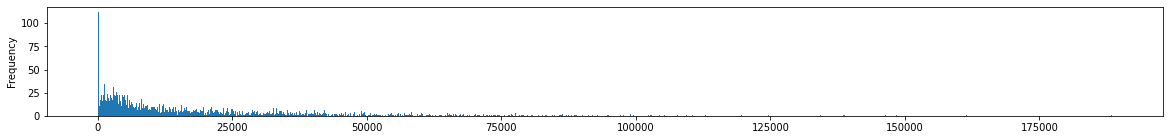

In [62]:
ax = user_time['time'].plot.hist(bins=1000, figsize=(20,2))
# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H-%M-%S'))


In [8]:
user_time.to_csv('../data/hetrec2011-delicious-2k/user_time.txt', sep='\t', index=False, header=False)

In [60]:
user_time = pd.read_csv('../data/hetrec2011-delicious-2k/user_time.txt', sep='\t', header=None, names=['user', 'start_ts', 'end_ts','time'])
user_time['time'] = user_time['time'].apply(lambda x: x//1000)
rate_num = len(user_time)
bin =  100
filt_rate = len(user_time[user_time['time'] > max(user_time['time'])/bin])

granularity = max(user_time['time'])/bin
print('Granularity: {}, days = {}, hours = {}'.format(granularity, granularity/(3600*24), granularity/(3600)))
print("User percentage (above minimum granularity): {} %".format(filt_rate/rate_num*100))
print('')
print('Average time length in total dataset {}, days = {}'.format(np.mean(user_time['time']), np.mean(user_time['time'])/(3600*24)))
print('Median time length in total dataset: {}, days = {}'.format(np.median(user_time['time']), np.median(user_time['time'])/(3600*24)))
print('')

filted_user_time = user_time.loc[user_time['time'] > granularity]
print('Average time length above minimum granularity: {}, days = {}'.format(np.mean(filted_user_time['time']), np.mean(filted_user_time['time'])/(3600*24)))
print('Median time length above minimum granularity: {}, days = {}'.format(np.median(filted_user_time['time']), np.median(filted_user_time['time'])/(3600*24)))


Granularity: 1885.7, days = 0.021825231481481484, hours = 0.5238055555555555
User percentage (above minimum granularity): 84.35993572576325 %

Average time length in total dataset 18755.983395822175, days = 0.21708314115534924
Median time length in total dataset: 10115.0, days = 0.11707175925925926

Average time length above minimum granularity: 22106.688253968256, days = 0.25586444738389186
Median time length above minimum granularity: 13772.0, days = 0.15939814814814815


In [64]:
user_time['start_ts'] = user_time['start_ts'].apply(lambda x: pd.to_datetime(x, unit='ms'))
user_time['end_ts'] = user_time['end_ts'].apply(lambda x: pd.to_datetime(x, unit='ms'))
user_time['time'] = user_time['time'].apply(lambda x: pd.to_timedelta(x, unit='s'))
user_time.sort_values(by='time', inplace=True)
user_time
# plt.hist(user_time['time'])

,user,start_ts,end_ts,time
1318,32910,2010-08-26 16:48:57,2010-08-26 16:58:27,0 days 00:00:00
1695,99481,2010-10-14 15:00:23,2010-10-14 15:00:23,0 days 00:00:00
1700,92476,2010-10-15 01:37:54,2010-10-15 01:37:54,0 days 00:00:00
1706,26937,2010-10-15 11:12:25,2010-10-15 11:12:25,0 days 00:00:00
1708,83954,2010-10-15 12:09:02,2010-10-15 12:22:58,0 days 00:00:00
...,...,...,...,...
0,56067,2003-11-20 06:12:43,2008-04-13 06:44:59,1 days 14:32:40
2,58300,2004-10-28 00:42:42,2009-06-17 16:13:37,1 days 16:38:51
5,69405,2005-11-09 18:35:21,2010-07-24 17:06:46,1 days 17:13:49
1,52828,2004-09-21 03:27:44,2009-11-03 22:56:31,1 days 20:52:31


In [41]:
users = df['userID'].drop_duplicates()
relations = df['tagID'].drop_duplicates()
items = df['bookmarkID'].drop_duplicates()

print('Total Dataset: #users: {}, #relations: {}, #items: {}'.format(len(users), len(relations), len(items)))

sub_user = filted_user_time.sort_values(by=['user'])['user'].tolist()
sub_user.sort()
new_user = list(range(1, len(sub_user) + 1))
user_map = dict(zip(sub_user, new_user))

sub_df = df.loc[df['userID'].isin(sub_user)]
sub_df.sort_values(by=['timestamp'], inplace=True)

# map old user id to new id
sub_df['userID'] = sub_df['userID'].apply(lambda x: user_map[x])
# map old item id to new id
sub_item = sub_df['bookmarkID'].drop_duplicates().sort_values().tolist()
new_item = list(range(1 + len(new_user), len(sub_item) + len(new_user) + 1))
item_map = dict(zip(sub_item, new_item))
sub_df['bookmarkID'] = sub_df['bookmarkID'].apply(lambda x: item_map[x])
# sub_df.to_csv('../data/hetrec2011-delicious-2k/sub_rating.dat', sep='::', index=False, header=False)

sub_relation = sub_df['tagID'].drop_duplicates()
print('Sub Dataset: #users: {}, #relations: {}, #items: {}'.format(len(sub_user), len(sub_relation), len(sub_item)))


# split the dataset to train, validation and test and save
split = [0.7, 0.15, 0.15]
rat_num = len(sub_df)
train_data, val_data, test_data = sub_df[:int(rat_num*split[0])],\
    sub_df[int(rat_num*split[0]) : int(rat_num*(split[0]+split[1]))], \
    sub_df[int(rat_num*(split[0]+split[1])) :]

sub_df.to_csv('../data/hetrec2011-delicious-2k/ratings.txt', sep='\t', index=False, header=False)
train_data.to_csv('../data/hetrec2011-delicious-2k/train.txt', sep='\t', index=False, header=False)
val_data.to_csv('../data/hetrec2011-delicious-2k/valid.txt', sep='\t', index=False, header=False)
test_data.to_csv('../data/hetrec2011-delicious-2k/test.txt', sep='\t', index=False, header=False)

Total Dataset: #users: 1867, #relations: 40897, #items: 69223
Sub Dataset: #users: 1775, #relations: 40481, #items: 68998


In [42]:
# create entity2id and relation2id
new_user_ = ['user' + str(x) for x in new_user]
new_item_ = ['item' + str(x - len(new_user)) for x in new_item]
#new_user = pd.DataFrame(new_user).apply(lambda x: 'user' + str(x))
#new_movie = pd.DataFrame(new_movie).apply(lambda x: 'movie' + str(x))
pd.DataFrame(list(zip(new_user_+new_item_, new_user+new_item))).to_csv('../data/hetrec2011-delicious-2k/entity2id.txt', sep='\t', index=False, header=None)

relations = pd.read_csv('../data/hetrec2011-delicious-2k/tags.dat', sep='\t', header=[0])
sub_relation_df = relations.loc[relations['id'].isin(sub_relation)]
sub_relation = sub_relation_df['id'].drop_duplicates().sort_values().tolist()
new_relation = list(range(1, 1 + len(sub_relation_df)))
relation_map = dict(zip(sub_relation, new_relation))
sub_relation_df['id'] = sub_relation_df['id'].apply(lambda x: relation_map[x])
sub_relation_df = sub_relation_df[['value','id']]
# sub_relation_df.loc[sub_relation_df['id'] == 7972]['value'] = 'null'
sub_relation_df['value'] = sub_relation_df['value'].replace(np.nan, 'null')
sub_relation_df.to_csv('../data/hetrec2011-delicious-2k/relation2id.txt', sep='\t', index=False, header= False)